In [1]:
import shutil
import pandas as pd
import numpy as np
from scipy import stats
import os
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
from IPython.display import Audio, display

pd.options.mode.chained_assignment = None   # turn off warnings

# Import delay data

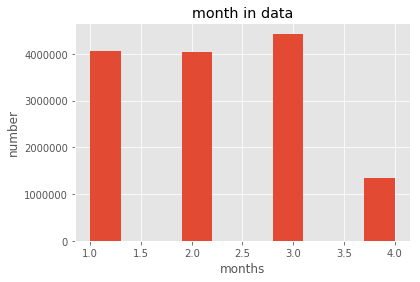

delay data rows: 13890687
delay data columns: 6
   linie  richtung betriebsdatum  soll_an_von  ist_an_von       time
0      2         1    2018-01-04        17580       17557 2018-04-01
1      2         1    2018-01-04        17802       17826 2018-04-01
2      2         1    2018-01-04        18222       18196 2018-04-01
linie                     int64
richtung                  int64
betriebsdatum    datetime64[ns]
soll_an_von               int64
ist_an_von                int64
time             datetime64[ns]
dtype: object


In [2]:
# === list one for DD-MM files
listpaths1 = [
    'https://data.stadt-zuerich.ch/dataset/vbz_fahrzeiten_ogd/resource/152051e6-1193-43c0-89b8-21b361f49970/download/fahrzeiten_soll_ist_20180401_20180407.csv',
    'https://data.stadt-zuerich.ch/dataset/vbz_fahrzeiten_ogd/resource/97e59d2a-83ec-438f-ae6f-0fe85d9bc1e6/download/fahrzeiten_soll_ist_20180304_20180310.csv',
    'https://data.stadt-zuerich.ch/dataset/vbz_fahrzeiten_ogd/resource/f17a950d-5be5-4b00-bafd-3c859afcc6cc/download/fahrzeiten_soll_ist_20180204_20180210.csv'] 
frame1 = pd.DataFrame()
list_1 = []
for path_ in listpaths1:
    df1 = pd.read_csv(path_, usecols=[0,1,2,10,11], parse_dates=['betriebsdatum'] ,infer_datetime_format=True,  index_col=None)
    list_1.append(df1)
df1 = pd.concat(list_1)

# === change datime from DD-MM to MM-DD
df1['betriebsdatum'] = pd.to_datetime(df1['betriebsdatum'])
df1['time'] = df1['betriebsdatum'].dt.strftime('%Y-%d-%m')
df1['time'] = pd.to_datetime(df1['time'], format='%Y-%m-%d', errors='ignore')


# === list two for MM-DD files
listpaths2 = [
    'https://data.stadt-zuerich.ch/dataset/vbz_fahrzeiten_ogd/resource/03ec9d0a-b16f-4e78-8e4f-2da4970efbb6/download/fahrzeiten_soll_ist_20180325_20180331.csv',
    'https://data.stadt-zuerich.ch/dataset/vbz_fahrzeiten_ogd/resource/c88a3801-c6fc-4d32-8ece-e269899be497/download/fahrzeiten_soll_ist_20180318_20180324.csv',
    'https://data.stadt-zuerich.ch/dataset/vbz_fahrzeiten_ogd/resource/a265b5d8-287f-4d22-88b2-f3a1770e1a4a/download/fahrzeiten_soll_ist_20180225_20180303.csv',
    'https://data.stadt-zuerich.ch/dataset/vbz_fahrzeiten_ogd/resource/1ac13127-fcde-4ac2-8462-50f348fd28fe/download/fahrzeiten_soll_ist_20180218_20180224.csv',
    'https://data.stadt-zuerich.ch/dataset/vbz_fahrzeiten_ogd/resource/ee7f8901-5466-425d-98e6-98ddcf849079/download/fahrzeiten_soll_ist_20180128_20180203.csv',
    'https://data.stadt-zuerich.ch/dataset/vbz_fahrzeiten_ogd/resource/b45b383e-4b0d-4ad0-8bee-e958c5e7360a/download/fahrzeiten_soll_ist_20180121_20180127.csv',
    'https://data.stadt-zuerich.ch/dataset/vbz_fahrzeiten_ogd/resource/4bbaf516-824a-41b3-8a95-6679745ce7d3/download/fahrzeiten_soll_ist_20180114_20180120.csv']

frame2 = pd.DataFrame()
list_2 = []
for path_ in listpaths2:
    df2 = pd.read_csv(path_, usecols=[0,1,2,10,11], parse_dates=['betriebsdatum'] ,infer_datetime_format=True, index_col=None)
    list_2.append(df2)
df2 = pd.concat(list_2)

df2['time'] = pd.to_datetime(df2['betriebsdatum'])

# === concat both frames
frames = [df1, df2]
df = pd.concat(frames)

# === check month in dataset
style.use("ggplot")
# === output folder for check
newpath = r'./output/'
if os.path.exists(newpath):
    shutil.rmtree(newpath, ignore_errors=True)
os.makedirs(newpath)

month = df.copy()
month['time'] = month.loc[:, 'time'].dt.month
plt.hist(month.loc[:, 'time'])
plt.title("month in data")
plt.xlabel("months")
plt.ylabel("number")
plt.savefig('./output/checkmonths.png', format='png', dpi=800)
plt.show()

# === check data size
col = df.shape[1]
row = df.shape[0]
print('delay data rows: %d' % row)
print('delay data columns: %d' % col)
print(df.head(3))
print(df.dtypes)

display(Audio("./weather/ape.mp3", autoplay=True))

## Clean up data

In [5]:
df3 = df.copy()
df3.drop(df.columns[[2]], axis=1, inplace=True)
df3.loc[:, 'diff'] = (df3['ist_an_von'] - df3['soll_an_von'])
df4 = df3.copy()
df4.reset_index(drop=True, inplace=True)
df4.loc[:, 'zeit'] = df4.loc[:, 'soll_an_von'].copy().astype(float)
df4.loc[:, 'zeit'] = pd.to_datetime(df4.loc[:, 'zeit'], errors='coerce', unit='s')
df4.loc[:, 'zeit'] = df4.loc[:, 'zeit'].dt.strftime('%H:%M')
df4.loc[:, 'zeit'] = pd.to_datetime(df4.loc[:, 'zeit'], format='%h:%m', errors='ignore')
df5 = df4.copy()
df5.drop(df5.columns[[2, 3]], axis=1, inplace=True)
df6 = df5.copy()
df6['time'] = df6['time'].dt.strftime('%Y%m%d')
df6['time'] = pd.to_datetime(df6['time'] + ' ' + df5['zeit'])
df7 = df6.copy()
df7.loc[:, 'diff'] = df7.loc[:, 'diff'].apply(pd.to_numeric, errors='coerce', downcast='float')
df7.loc[:, 'time'] = df7.loc[:, 'time'].dt.round('60min')
df7 = df7.dropna(how='any')
df7['diff'] = df7['diff'].astype(int)
df8 = df7.copy()
df8.drop(df8.columns[[4]], axis=1, inplace=True)
df8['diff'] = df8['diff'] / 60    # from seconds to minutes
df8['weekday'] = df8['time'].dt.dayofweek    # add weekday col
df8['hour'] = df8['time'].dt.hour    # add hour col

# # === check size
# print('cleaned data head:')
# print(df8.head(4))
# print('cleaned data dtypes:')
# print(df8.dtypes)
# col = df8.shape[1]
# row = df8.shape[0]
# print('cleaned data rows: %d' % row)
# print('cleaned data cols: %d' % col)

# === filter linie 69
def mask(df, key, value):
    return df[df[key] == value]
pd.DataFrame.mask = mask

df69 = df8.mask('linie', 69)

# # === check size
# print('cleaned 69 data head:')
# print(df8.head(4))
# print('cleaned 69 data dtypes:')
# print(df8.dtypes)
# col = df69.shape[1]
# row = df69.shape[0]
# print('cleaned 69 data rows: %d' % row)
# print('cleaned 69 data cols: %d' % col)

cleaned data head:
   linie  richtung                time      diff  weekday  hour
0      2         1 2018-04-01 05:00:00 -0.383333        6     5
1      2         1 2018-04-01 05:00:00  0.400000        6     5
2      2         1 2018-04-01 05:00:00 -0.433333        6     5
3      2         1 2018-04-01 05:00:00 -0.450000        6     5
cleaned data dtypes:
linie                int64
richtung             int64
time        datetime64[ns]
diff               float64
weekday              int64
hour                 int64
dtype: object
cleaned data rows: 13890687
cleaned data cols: 6
cleaned 69 data head:
   linie  richtung                time      diff  weekday  hour
0      2         1 2018-04-01 05:00:00 -0.383333        6     5
1      2         1 2018-04-01 05:00:00  0.400000        6     5
2      2         1 2018-04-01 05:00:00 -0.433333        6     5
3      2         1 2018-04-01 05:00:00 -0.450000        6     5
cleaned 69 data dtypes:
linie                int64
richtung             i

## Output data to csv

In [6]:
newpath = r'./delay_data/'
if os.path.exists(newpath):
    shutil.rmtree(newpath, ignore_errors=True)
os.makedirs(newpath)

df8.to_csv('./delay_data/df.csv', index=False)
df69.to_csv('./delay_data/df_69.csv', index=False)

display(Audio("./weather/ape.mp3", autoplay=True))